Consistency Score (Bowler) = W1 × (Inns / Mat)  + W2 × (Wkts) - W3 × Ave - W4 × Econ - W5 × (SR / 100) + W6 × ((4W + 1.25*5W)) + W7 × (Mdns)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def analyze_and_visualize(df):
    # Select Features for Analysis
    features = ['Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 
                'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W']
    df_analysis = df[features]
    
    # Replace infinities and NaN with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis

In [6]:
def calculate_bowler_formula_components(df):
    """
    Calculates the components of the Bowler Consistency Score formula.
    """
    df_components = df.copy()

    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Inns'] = pd.to_numeric(df_components['Inns'], errors='coerce')
    df_components['Mat'] = pd.to_numeric(df_components['Mat'], errors='coerce')
    df_components['Overs'] = pd.to_numeric(df_components['Overs'], errors='coerce')
    df_components['Wkts'] = pd.to_numeric(df_components['Wkts'], errors='coerce')
    df_components['Ave'] = pd.to_numeric(df_components['Ave'], errors='coerce')
    df_components['Econ'] = pd.to_numeric(df_components['Econ'], errors='coerce')
    df_components['SR'] = pd.to_numeric(df_components['SR'], errors='coerce')
    df_components['4W'] = pd.to_numeric(df_components['4W'], errors='coerce')
    df_components['5W'] = pd.to_numeric(df_components['5W'], errors='coerce')
    df_components['Mdns'] = pd.to_numeric(df_components['Mdns'], errors='coerce')

    # Perform calculations, ensure float division and handle potential NaN values
    df_components['Inns_per_Mat'] = df_components['Inns'].astype(float) / df_components['Mat'].astype(float) # Ensure float division
    df_components['Wkts_per_Overs'] = df_components['Wkts'].astype(float) 
    df_components['Ave_Score'] = df_components['Ave'].astype(float)  # Direct Ave
    df_components['Econ_Rate'] = df_components['Econ'].astype(float)  # Direct Econ
    df_components['SR_per_100'] = df_components['SR'].astype(float) / 100
    df_components['4W5W_per_Inns'] = (df_components['4W'].astype(float) + 1.25 *  df_components['5W'].astype(float)) 
    df_components['Mdns_per_Overs'] = df_components['Mdns'].astype(float) 

    return df_components

In [8]:
data = pd.read_excel("../../cleaned all season/bowlerset_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")


Data types of your columns before calculation:


In [9]:
numeric_cols = ['Inns', 'Mat', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns'] # Added Mdns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes) # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Inns', 'Mat', 'Overs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns'] # Added Mdns if relevant, keep consistent
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum()) # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any') # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned)) # Print length of df_cleaned


# Calculate bowler formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_bowler_formula_components(df_cleaned) # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'  
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr() # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Bowler Consistency Formula Components (after NaN removal):")
print(correlation_matrix)


Data types of your columns AFTER explicit numeric conversion:
Player                 object
Span                   object
Mat                     int64
Inns                    int64
Overs                 float64
Mdns                    int64
Runs                    int64
Wkts                    int64
Ave                   float64
Econ                  float64
SR                    float64
4W                      int64
5W                      int64
Type                   object
MostCommonPosition      int64
dtype: object

Number of NaN values BEFORE removing:
Inns     0
Mat      0
Overs    0
Wkts     0
Ave      0
Econ     0
SR       0
4W       0
5W       0
Mdns     0
dtype: int64

Number of rows BEFORE removing NaNs: 73
Number of rows AFTER removing NaNs: 73

Correlation Matrix of Bowler Consistency Formula Components (after NaN removal):
                Inns_per_Mat  Wkts_per_Overs  Ave_Score  Econ_Rate  \
Inns_per_Mat        1.000000       -0.106221   0.179129   0.169885   
Wkts_per_

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_bowler_consistency_components(df_components):
    features = [
        'Inns_per_Mat',
        'Wkts_per_Overs',
        'Ave_Score',
        'Econ_Rate',
        'SR_per_100',
        '4W5W_per_Inns',
        'Mdns_per_Overs'
    ]
    df_analysis = df_components[features].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5) # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Bowler Consistency Formula Components')
    plt.show()

    return df_analysis




                Inns_per_Mat  Wkts_per_Overs  Ave_Score  Econ_Rate  \
Inns_per_Mat        1.000000       -0.106221   0.179129   0.169885   
Wkts_per_Overs     -0.106221        1.000000  -0.402099  -0.554525   
Ave_Score           0.179129       -0.402099   1.000000   0.801928   
Econ_Rate           0.169885       -0.554525   0.801928   1.000000   
SR_per_100          0.131750       -0.277979   0.922089   0.643914   
4W5W_per_Inns      -0.084162        0.826561  -0.338911  -0.421152   
Mdns_per_Overs     -0.026379        0.735729  -0.230808  -0.379860   

                SR_per_100  4W5W_per_Inns  Mdns_per_Overs  
Inns_per_Mat      0.131750      -0.084162       -0.026379  
Wkts_per_Overs   -0.277979       0.826561        0.735729  
Ave_Score         0.922089      -0.338911       -0.230808  
Econ_Rate         0.643914      -0.421152       -0.379860  
SR_per_100        1.000000      -0.233383       -0.149720  
4W5W_per_Inns    -0.233383       1.000000        0.460481  
Mdns_per_Overs   -0

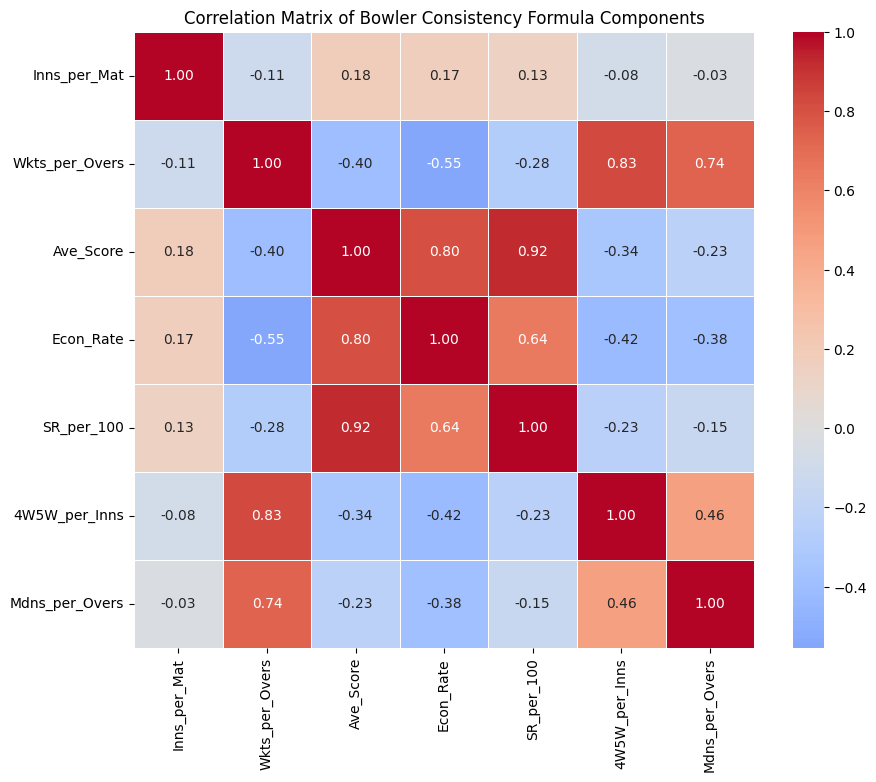

In [11]:
analyzed_df = analyze_bowler_consistency_components(calculations_with_data)


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Assuming calculations_with_data is your DataFrame after computing the derived metrics,
# and that it includes the following component columns:
features = [
    'Inns_per_Mat', 
    'Wkts_per_Overs', 
    'Ave_Score', 
    'Econ_Rate', 
    'SR_per_100', 
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# You can use the loadings for PC1 (which explains most variance) as guidance for the weights:
pc1_loadings = loadings['PC1']
# Normalize the PC1 loadings (absolute values) to sum to 1:
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# For AHP, you typically have expert input in the form of a pairwise comparison matrix.
# Here’s an example pairwise comparison matrix for the 7 criteria. 
# (You should adjust these values based on domain expertise.)
pairwise_matrix = np.array([
    [1,     2,     3,     4,     5,     6,     7],
    [1/2,   1,     2,     3,     4,     5,     6],
    [1/3,   1/2,   1,     2,     3,     4,     5],
    [1/4,   1/3,   1/2,   1,     2,     3,     4],
    [1/5,   1/4,   1/3,   1/2,   1,     2,     3],
    [1/6,   1/5,   1/4,   1/3,   1/2,   1,     2],
    [1/7,   1/6,   1/5,   1/4,   1/3,   1/2,   1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
# Normalize to sum to 1
ahp_weights = ahp_weights / ahp_weights.sum()

# Create a Series with these weights for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # weights: array of shape (7,)
    # df: DataFrame containing the metrics in the order of 'features'
    return np.dot(df[features].values, weights)

# Define an objective function.
# In this example, we aim to maximize the variance of the consistency score.
# (Maximizing variance might help differentiate between players.)
def objective(weights, df):
    scores = consistency_score(weights, df)
    # We minimize the negative variance.
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
# Define bounds if needed (here we constrain weights between 0 and 1)
bounds = [(0, 1)] * len(features)

# Run the optimization
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

# Display the optimized weights
optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                     PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat    0.116025  0.154341  0.977453 -0.063976 -0.050681  0.016002   
Wkts_per_Overs -0.435129  0.421223 -0.034289 -0.087389 -0.002541  0.789532   
Ave_Score       0.441799  0.418747 -0.108911  0.005110 -0.105902  0.047521   
Econ_Rate       0.453216  0.195156 -0.056949 -0.106030  0.809600  0.123072   
SR_per_100      0.384594  0.481622 -0.158803 -0.002284 -0.518053 -0.077080   
4W5W_per_Inns  -0.376036  0.386769 -0.045501 -0.673187  0.116246 -0.487683   
Mdns_per_Overs -0.327557  0.451404  0.031864  0.723751  0.221057 -0.339414   

                     PC7  
Inns_per_Mat   -0.019601  
Wkts_per_Overs -0.032451  
Ave_Score       0.777241  
Econ_Rate      -0.267256  
SR_per_100     -0.566201  
4W5W_per_Inns   0.049077  
Mdns_per_Overs -0.006431  

Suggested Weights from PCA (based on PC1 loadings):
Econ_Rate         0.178829
Ave_Score         0.174324

In [13]:
import pandas as pd

# Full list of metrics
features = ['Inns_per_Mat', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Inns', 'Mdns_per_Overs']

# Original AHP weights from expert pairwise comparisons for all features (updated values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.354284,
    'Wkts_per_Overs': 0.239928,
    'Ave_Score': 0.158655,
    'Econ_Rate': 0.103625,
    'SR_per_100': 0.067565,
    '4W5W_per_Inns': 0.044769,
    'Mdns_per_Overs': 0.031175
})

# Original PCA weights derived from PC1 loadings for all features (updated values)
pca_weights = pd.Series({
    'Ave_Score': 0.174324,
    'SR_per_100': 0.151752,
    'Econ_Rate': 0.178829,
    'Inns_per_Mat': 0.045781,
    '4W5W_per_Inns': 0.148375,
    'Wkts_per_Overs': 0.171692,
    'Mdns_per_Overs': 0.129247
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Now, define boost factors to increase the importance of the selected metrics.
# In this example, we give a boost factor of 2 to the important metrics and leave the others unchanged (factor of 1).
boost_factors = {
    'Inns_per_Mat': 1.0,
    'Wkts_per_Overs': 2.0,
    'Ave_Score': 2.0,
    'Econ_Rate': 2.0,
    'SR_per_100': 2.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors to the hybrid weights
hybrid_weights_boosted = hybrid_weights.copy()
for metric in features:
    hybrid_weights_boosted[metric] *= boost_factors[metric]

# Normalize again so the boosted weights sum to 1
hybrid_weights_boosted = hybrid_weights_boosted / hybrid_weights_boosted.sum()

print("Hybrid Weights with Emphasis on Selected Metrics:")
print(hybrid_weights_boosted)


Hybrid Weights with Emphasis on Selected Metrics:
4W5W_per_Inns     0.047353
Ave_Score         0.203963
Econ_Rate         0.157553
Inns_per_Mat      0.163397
Mdns_per_Overs    0.037830
SR_per_100        0.115895
Wkts_per_Overs    0.274010
dtype: float64


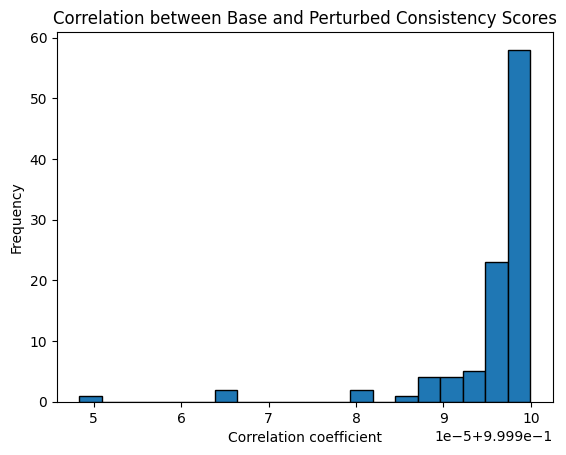

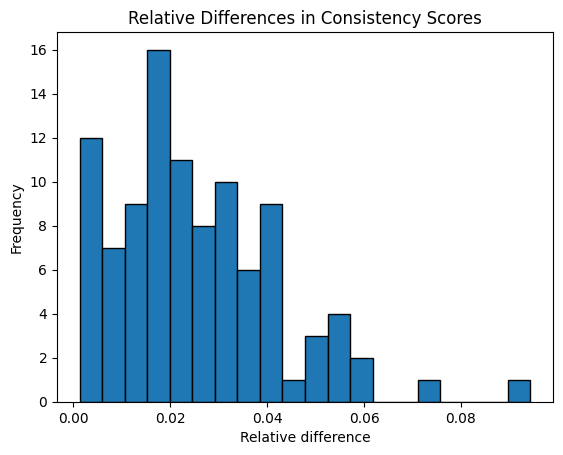

Mean correlation: 0.9999955822980501
Mean relative difference: 0.025296985885253195


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
features = ['Inns_per_Mat', 'Overs_per_Mat', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Mat', 'Mdns_per_Overs']

# Define a function to compute the composite consistency score
def compute_consistency_score(df, weights):
    # Make sure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Compute the base consistency scores with your nominal weights
base_scores = compute_consistency_score(calculations_with_data, hybrid_weights_boosted)

# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(calculations_with_data, perturbed_weights)
    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = [np.corrcoef(base_scores, scores)[0, 1] for scores in perturbed_scores_list]

# Also compute the mean relative difference between perturbed scores and base scores
relative_differences = [
    np.mean(np.abs(scores - base_scores)) / np.mean(np.abs(base_scores))
    for scores in perturbed_scores_list
]

# Plot the distribution of correlation coefficients
plt.hist(correlations, bins=20, edgecolor='k')
plt.title("Correlation between Base and Perturbed Consistency Scores")
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of relative differences
plt.hist(relative_differences, bins=20, edgecolor='k')
plt.title("Relative Differences in Consistency Scores")
plt.xlabel("Relative difference")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print("Mean correlation:", np.mean(correlations))
print("Mean relative difference:", np.mean(relative_differences))


# FINAL CONSISTENCY SCORE CALCULATION
### Consistency Score (Bowler) = (0.163397 × Inns / Mat) + (0.274010 × Wkts) - (0.203963 × Ave) - (0.157553 × Econ) - (0.115895 × SR / 100) + (0.047353 × (4W + 1.25 × 5W)) + (0.037830 × Mdns)

In [2]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/cleaned last season/lastseasoniplbowlingg.xlsx"  # Update with your actual file path
df = pd.read_excel(file_path)

# Define weights from the updated formula
weights = {
    "Inns_per_Mat": 0.163397,
    "Wkts": 0.274010,
    "Ave": 0.203963,
    "Econ": 0.157553,
    "SR": 0.115895,
    "4W5W": 0.047353,
    "Mdns": 0.037830
}

# Compute Inns / Mat
df["Inns_per_Mat"] = df["Inns"] / df["Mat"]

# Compute 4W + 1.25 * 5W
df["4W5W"] = df["4W"] + 1.25 * df["5W"]

# Compute Consistency Score
df["Consistency_Score"] = (
    weights["Inns_per_Mat"] * df["Inns_per_Mat"] +
    weights["Wkts"] * df["Wkts"] -
    weights["Ave"] * df["Ave"] -
    weights["Econ"] * df["Econ"] -
    weights["SR"] * (df["SR"] / 100) +
    weights["4W5W"] * df["4W5W"] +
    weights["Mdns"] * df["Mdns"]
) 

# Save the updated file
output_file = "bowler_data_ipl_score.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as bowler_data_ipl_score.xlsx


In [1]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/cleaned all season/bowlerset_ipl.xlsx"  # Update with your actual file path
df = pd.read_excel(file_path)

# Compute additional metrics
df["Inns_per_Mat"] = df["Inns"] / df["Mat"]
df["4W5W"] = df["4W"] + 1.25 * df["5W"]

# AHP Weights
ahp_weights = {
    "Inns_per_Mat": 0.354284,
    "Wkts": 0.239928,
    "Ave": 0.158655,
    "Econ": 0.103625,
    "SR": 0.067565,
    "4W5W": 0.044769,
    "Mdns": 0.031175
}

# PCA Weights
pca_weights = {
    "Inns_per_Mat": 0.045781,
    "Wkts": 0.239928,
    "Ave": 0.174324,
    "Econ": 0.178829,
    "SR": 0.151752,
    "4W5W": 0.148375,
    "Mdns": 0.129247
}

# Compute AHP Consistency Score
df["Consistency_AHP"] = (
    ahp_weights["Inns_per_Mat"] * df["Inns_per_Mat"] +
    ahp_weights["Wkts"] * df["Wkts"] -
    ahp_weights["Ave"] * df["Ave"] -
    ahp_weights["Econ"] * df["Econ"] -
    ahp_weights["SR"] * (df["SR"] / 100) +
    ahp_weights["4W5W"] * df["4W5W"] +
    ahp_weights["Mdns"] * df["Mdns"]
)

# Compute PCA Consistency Score
df["Consistency_PCA"] = (
    pca_weights["Inns_per_Mat"] * df["Inns_per_Mat"] +
    pca_weights["Wkts"] * df["Wkts"] -
    pca_weights["Ave"] * df["Ave"] -
    pca_weights["Econ"] * df["Econ"] -
    pca_weights["SR"] * (df["SR"] / 100) +
    pca_weights["4W5W"] * df["4W5W"] +
    pca_weights["Mdns"] * df["Mdns"]
)

# Save the updated file
output_file = "bowler_data_ipl_AHP_PCA_score_ipl.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as bowler_data_ipl_AHP_PCA_score_ipl.xlsx
